# Illustration: Simulation of a stock price process

Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Simulate a stock price process

Simulating a trajectory of the stock price process $(S_t)_{t \in [0,T]}$ described by the stochastic differential equation (SDE)

$$ dS_t = \mu \cdot S_t \, dt + \sigma \cdot S_t \, dB_t, \quad S_0 =s. $$

See also Lecture 15. The simulation follows the description on slide 12 **(Euler method)**

In [2]:
def simulateStockPrice(numberOfSteps, T, s0, mu, sigma):
    
    priceProcess = np.zeros(numberOfSteps + 1)
    
    priceProcess[0] = s0
    
    stepsize = T/numberOfSteps
    
    for i in range(numberOfSteps):
        
        priceProcess[i+1] = priceProcess[i] + priceProcess[i] * mu * stepsize + priceProcess[i] * sigma * np.sqrt(stepsize) * np.random.normal(0, 1)
    
    return priceProcess

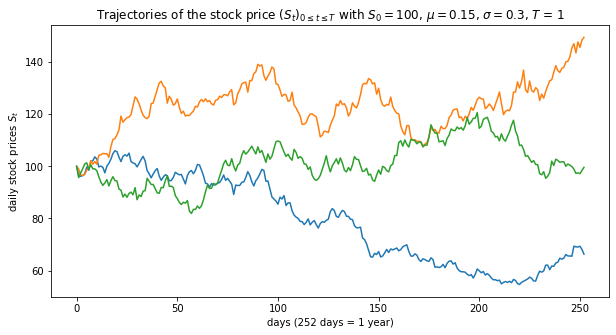

In [42]:
numberOfSteps = 252

mu = 0.15
sigma = 0.3
s0 = 100

T = 1

stockprice1 = simulateStockPrice(numberOfSteps, T, s0, mu, sigma)
stockprice2 = simulateStockPrice(numberOfSteps, T, s0, mu, sigma)
stockprice3 = simulateStockPrice(numberOfSteps, T, s0, mu, sigma)

plt.figure(figsize=(10,5))

plt.plot(np.linspace(0,T,numberOfSteps+1)*252,stockprice1)
plt.plot(np.linspace(0,T,numberOfSteps+1)*252,stockprice2)
plt.plot(np.linspace(0,T,numberOfSteps+1)*252,stockprice3)

plt.xlabel("days (252 days = 1 year)")
plt.ylabel("daily stock prices $S_t$")
plt.title("Trajectories of the stock price $(S_t)_{0 \leq t \leq T}$ with $S_0=$" + str(s0) + 
          ", $\mu=$" + str(mu) + ", $\sigma=$" + str(sigma) + ", $T$ = "+str(T))

#plt.show()
plt.savefig("price.pdf")